# Perceptron from scratch

<img src="imgs/Components_of_neuron.jpg/" width=auto height=500 />

**Dendrites** – are thin branches located in the nerve cell. These cells act on receiving nerve input from other parts of our body.

**Soma** – acts as a summation function. As positive and negative signals (exciting and inhibiting, respectively) arrive in the soma from the dendrites they are added together.

**Axon** – gets its signal from the summation behavior which occurs inside the soma. It is formed by a single extended filament located throughout the neuron. The axon is responsible for sending nerve impulses to the external environment of a cell.

The perceptron learns by calculating the prediction :

$\hat{y} = f(\vec{w}\cdot \vec{x} + b) = f(w_1 x_1 + w_2 x_2 + \dots + w_nx_n + b)$

After that, we update the weights and the bias using as :

- $\hat{w}_i = w_i + \alpha(y-\hat{y})x_i$,  where $i=1,\dots,n$
- $\hat{b} = b + \alpha(y-\hat{y})$

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [68]:
X = np.random.uniform(size=(600,2))
y = np.where(np.sum(X, axis=1)>1, 1, 0)

In [69]:
data = pd.DataFrame(columns=('x1', 'x2'), data=X)
data['y'] = y

In [70]:
initial_weights = [0.1, 0.1]
initial_bias = 0.05
LearningRate = 0.1

SLP = Perceptron(weights=initial_weights, bias=initial_bias)

loss = 0
for i, line in data.iterrows():
    loss = loss + SLP.Learning(line[0:2], line[2])

Text(0.5, 1.0, 'Dummy data')

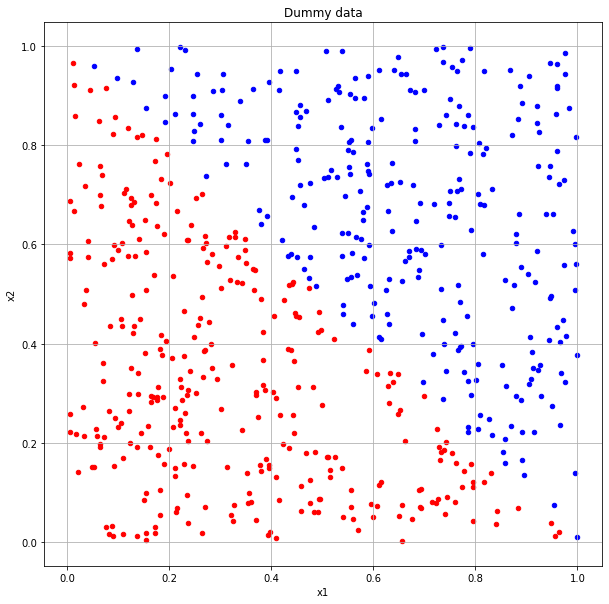

In [71]:
fig = plt.figure(figsize=(10,10))
fig.gca()
data[data.y==1].plot(kind='scatter', ax=fig.gca(), x='x1', y='x2', color='blue')
data[data.y==0].plot(kind='scatter', ax=fig.gca(), x='x1', y='x2', color='red')
plt.grid()
plt.title('Dummy data')